# **Inisialisasi**

In [ ]:
!pip install transformers Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory       = StemmerFactory()
stemmer       = factory.create_stemmer()
import random
import pickle
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Data Anaylsis**

In [ ]:
#Load file json
def load_json_file(filename):
    with open(filename) as f:
        file = json.load(f)
    return file

filename = '/content/intents.json'
intents = load_json_file(filename)

In [ ]:
def create_df(intents):
    patterns = []
    tags = []

    for intent in intents['intents']:
        for pattern in intent['patterns']:
            patterns.append(pattern)
            tags.append(intent['tag'])

    df = pd.DataFrame({
        'patterns': patterns,
        'tag': tags
    })

    return df

df = create_df(intents)
df

,patterns,tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa
...,...,...
1049,Bagaimana saya dapat memberikan kontribusi kep...,peran_yang_bisa_dilakukan
1050,Apakah ada cara bagi saya untuk membantu merin...,peran_yang_bisa_dilakukan
1051,Saya ingin memberikan dukungan kepada korban g...,peran_yang_bisa_dilakukan
1052,Adakah peran yang dapat saya ambil untuk mendu...,peran_yang_bisa_dilakukan


In [ ]:
def extract_json_info(json_file, df):

    for intent in json_file['intents']:

        for pattern in intent['patterns']:

            sentence_tag = [pattern, intent['tag']]
            df.loc[len(df.index)] = sentence_tag

    return df

df = extract_json_info(intents, df)
df.head(500)

,patterns,tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa
...,...,...
495,Maksud dari mantel,mantel
496,Pengertian mantel,mantel
497,Berikan saya definisi mantel,mantel
498,Apa sih yang dimaksud dengan mantel,mantel


In [ ]:
df2 = df.copy()
df2.head(500)

,patterns,tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa
...,...,...
495,Maksud dari mantel,mantel
496,Pengertian mantel,mantel
497,Berikan saya definisi mantel,mantel
498,Apa sih yang dimaksud dengan mantel,mantel


In [ ]:
def print_shape_df(df, ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")

print_shape_df(df, "Chatbot")

Chatbot dataset has 2108 rows and 2 columns


In [ ]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())

print_dfInfo(df, "Chatbot")

The info of Chatbot dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  2108 non-null   object
 1   tag       2108 non-null   object
dtypes: object(2)
memory usage: 49.4+ KB
None


In [ ]:
def num_classes(df, target_col, ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")

num_classes(df, 'tag', "Chatbot")

The Chatbot dataset has 102 classes


In [ ]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, "Chatbot")

Null Values in each col in the Chatbot dataset:

patterns    0
tag         0
dtype: int64


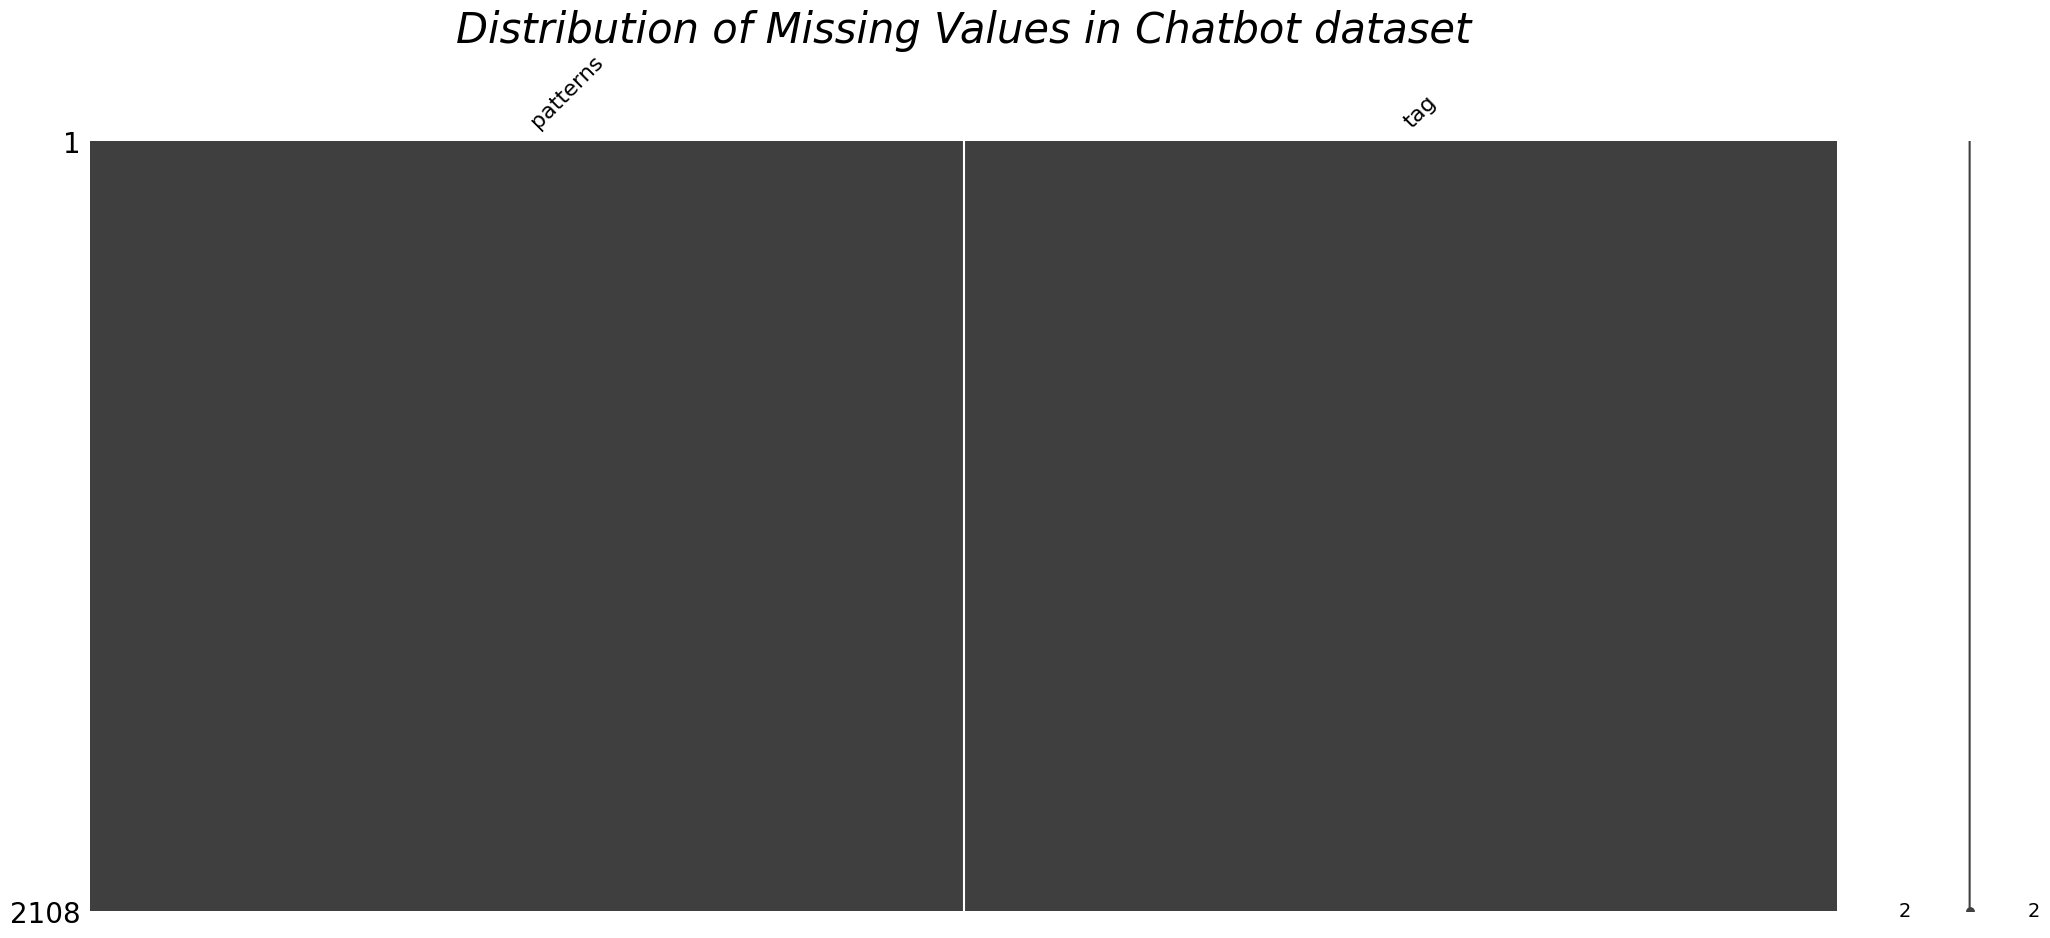

In [ ]:
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

plot_miss_vals(df, "Chatbot")

In [ ]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

<ipython-input-14-63e4ac2f4c5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)


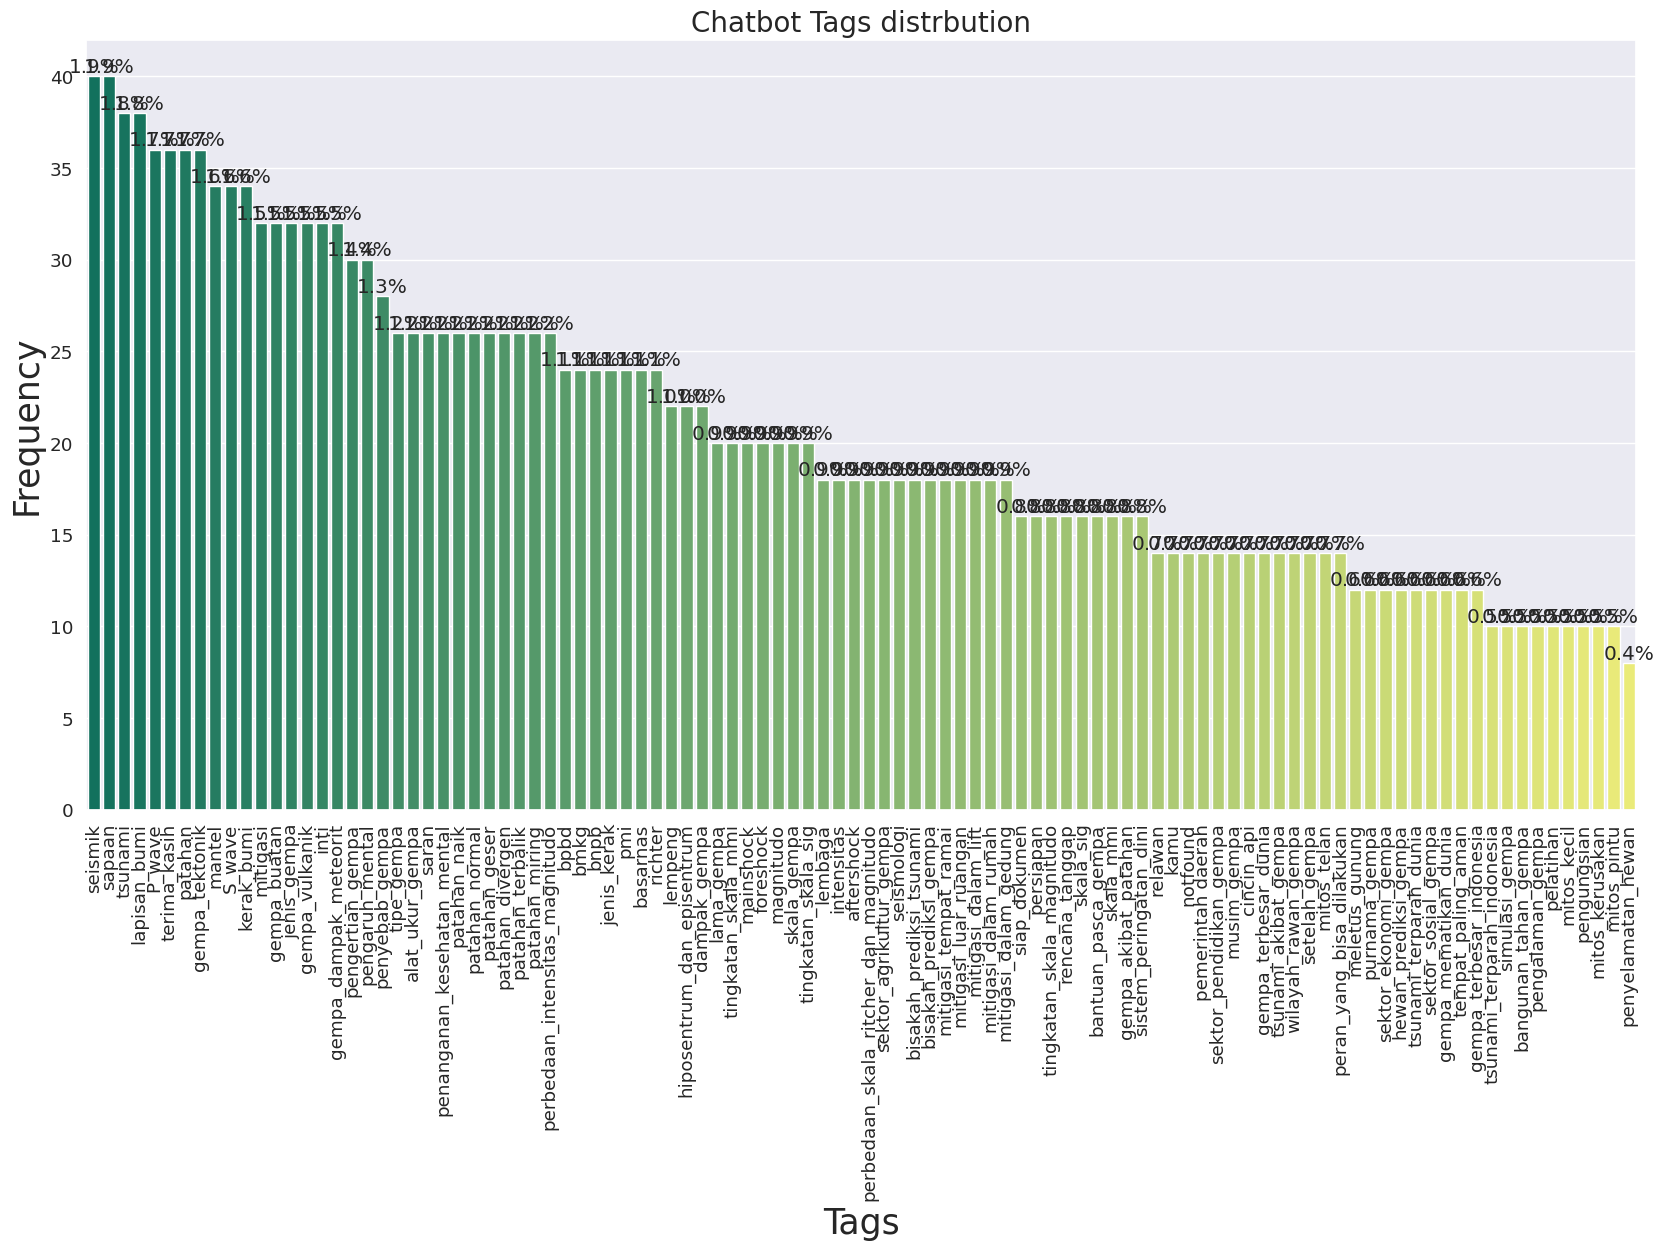

In [ ]:
sns.set(font_scale = 1.2)
order = df['tag'].value_counts().index
count_plot(df['tag'], df, "Chatbot Tags distrbution", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

In [ ]:
ignore_words=['?', '!', ',', '.']

def preprocess_pattern(patterns):
    words = word_tokenize(patterns.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
    return " ".join(stemmed_words)

df['patterns'] = df['patterns'].apply(preprocess_pattern)
df.head(500)

,patterns,tag
0,apa itu gempa bumi,pengertian_gempa
1,jelas gempa bumi,pengertian_gempa
2,erti dari gempa bumi,pengertian_gempa
3,gempa bumi itu apa,pengertian_gempa
4,erti gempa bumi,pengertian_gempa
...,...,...
495,maksud dari mantel,mantel
496,erti mantel,mantel
497,ikan saya definisi mantel,mantel
498,apa sih yang maksud dengan mantel,mantel


In [ ]:
print(df['patterns'].isnull().sum())

0


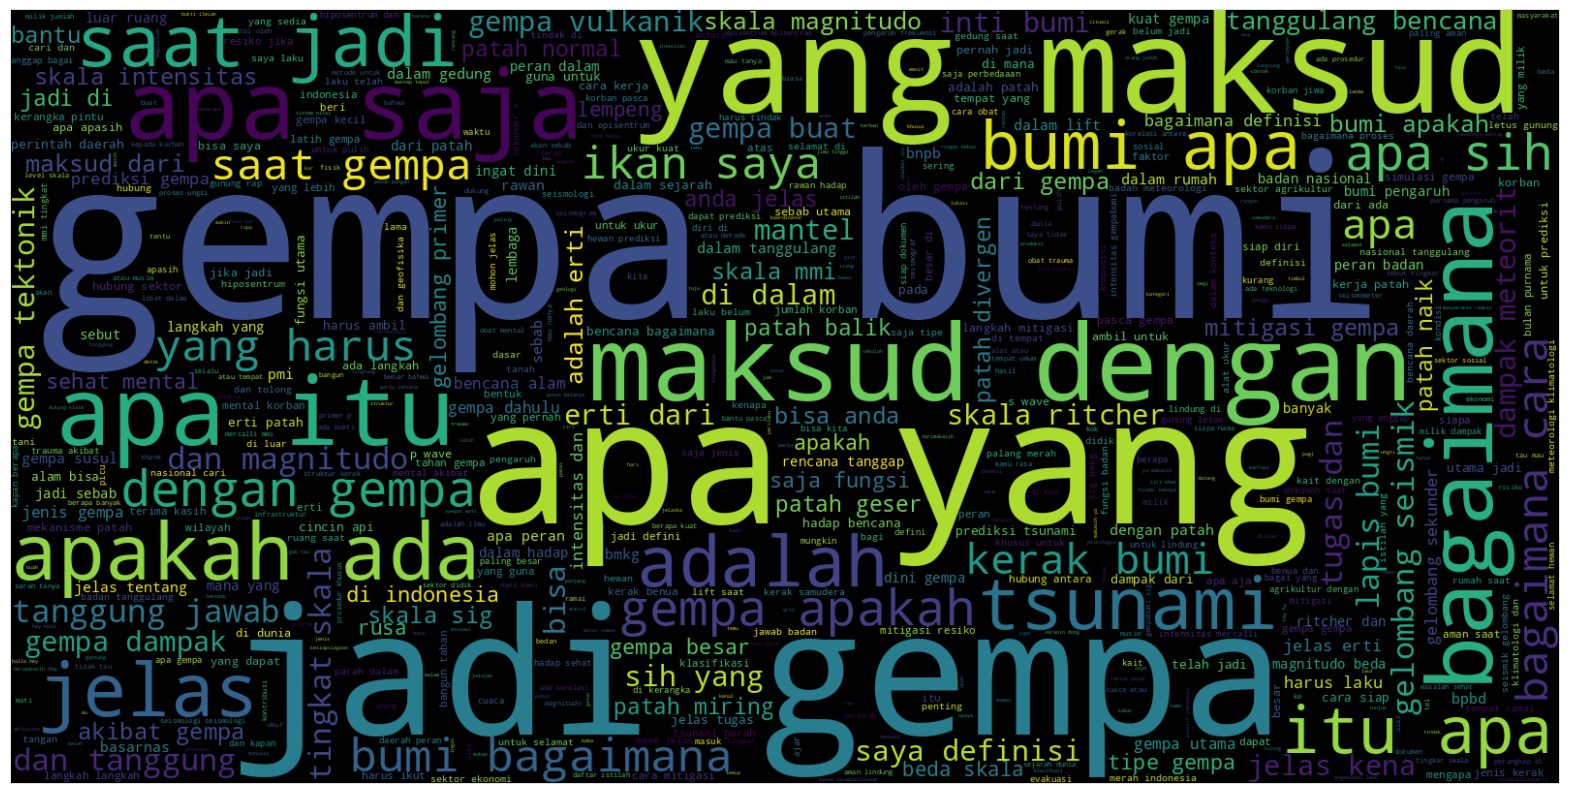

In [ ]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df['patterns']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

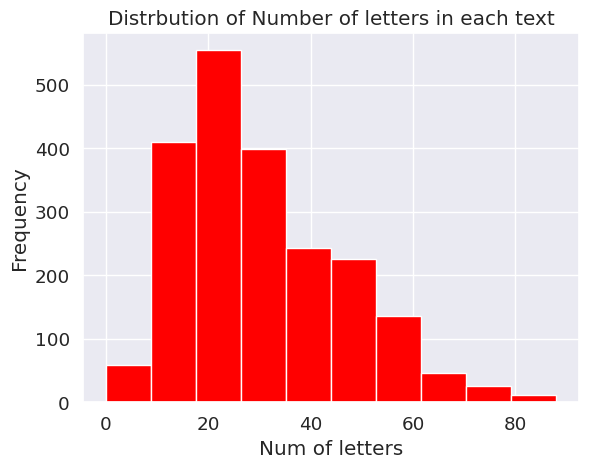

In [ ]:
letters_len=df['patterns'].str.len()
plt.hist(letters_len,color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

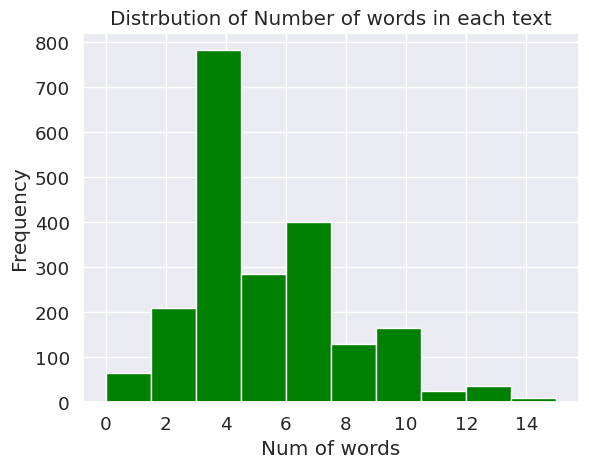

In [ ]:
words_len=df['patterns'].str.split().map(lambda x: len(x))
plt.hist(words_len,color='green')
plt.title("Distrbution of Number of words in each text")
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-21-a25868e20852>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,color='red')


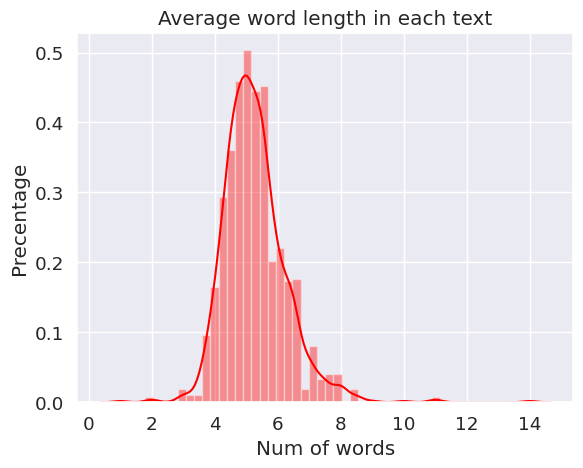

In [ ]:
word=df['patterns'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))
sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

In [ ]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.patterns)
corpus[:5]

['apa', 'itu', 'gempa', 'bumi', 'jelas']

In [ ]:
print(f"dataset contains {len(corpus)} words")

dataset contains 10670 words


In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'gempa': 990,
 'apa': 606,
 'yang': 388,
 'bumi': 386,
 'jadi': 262,
 'bagaimana': 236,
 'patah': 208,
 'jelas': 196,
 'apakah': 186,
 'dengan': 174}

In [ ]:
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

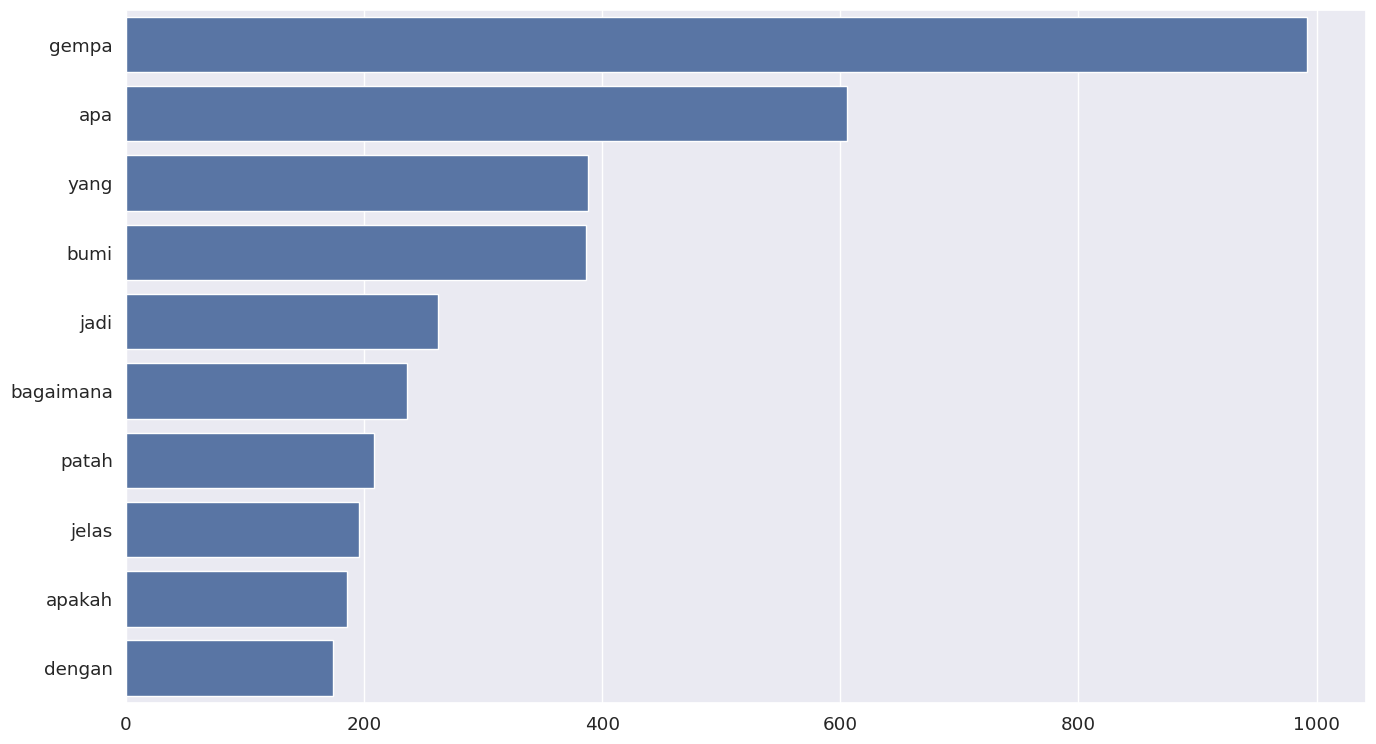

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.patterns,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()));

# **Preprocessing Sequential**





In [ ]:
df2.head(500)

,patterns,tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa
...,...,...
495,Maksud dari mantel,mantel
496,Pengertian mantel,mantel
497,Berikan saya definisi mantel,mantel
498,Apa sih yang dimaksud dengan mantel,mantel


In [ ]:
labels = df2['tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['pengertian_gempa',
 'penyebab_gempa',
 'jenis_gempa',
 'gempa_tektonik',
 'gempa_vulkanik',
 'gempa_dampak_meteorit',
 'gempa_buatan',
 'skala_gempa',
 'alat_ukur_gempa',
 'richter',
 'magnitudo',
 'tingkatan_skala_magnitudo',
 'perbedaan_skala_ritcher_dan_magnitudo',
 'hiposentrum_dan_episentrum',
 'dampak_gempa',
 'seismik',
 'seismologi',
 'P_wave',
 'S_wave',
 'tsunami',
 'tsunami_akibat_gempa',
 'tsunami_terparah_indonesia',
 'bisakah_prediksi_gempa',
 'bisakah_prediksi_tsunami',
 'hewan_prediksi_gempa',
 'wilayah_rawan_gempa',
 'patahan',
 'patahan_naik',
 'patahan_normal',
 'patahan_geser',
 'patahan_divergen',
 'patahan_terbalik',
 'patahan_miring',
 'gempa_akibat_patahan',
 'lempeng',
 'lapisan_bumi',
 'kerak_bumi',
 'jenis_kerak',
 'mantel',
 'inti',
 'mitigasi',
 'persiapan',
 'rencana_tanggap',
 'siap_dokumen',
 'mitigasi_dalam_gedung',
 'mitigasi_dalam_rumah',
 'mitigasi_dalam_lift',
 'mitigasi_luar_ruangan',
 'mitigasi_tempat_ramai',
 'tempat_paling_aman',
 'setelah_gem

In [ ]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [ ]:
id2label

{0: 'pengertian_gempa',
 1: 'penyebab_gempa',
 2: 'jenis_gempa',
 3: 'gempa_tektonik',
 4: 'gempa_vulkanik',
 5: 'gempa_dampak_meteorit',
 6: 'gempa_buatan',
 7: 'skala_gempa',
 8: 'alat_ukur_gempa',
 9: 'richter',
 10: 'magnitudo',
 11: 'tingkatan_skala_magnitudo',
 12: 'perbedaan_skala_ritcher_dan_magnitudo',
 13: 'hiposentrum_dan_episentrum',
 14: 'dampak_gempa',
 15: 'seismik',
 16: 'seismologi',
 17: 'P_wave',
 18: 'S_wave',
 19: 'tsunami',
 20: 'tsunami_akibat_gempa',
 21: 'tsunami_terparah_indonesia',
 22: 'bisakah_prediksi_gempa',
 23: 'bisakah_prediksi_tsunami',
 24: 'hewan_prediksi_gempa',
 25: 'wilayah_rawan_gempa',
 26: 'patahan',
 27: 'patahan_naik',
 28: 'patahan_normal',
 29: 'patahan_geser',
 30: 'patahan_divergen',
 31: 'patahan_terbalik',
 32: 'patahan_miring',
 33: 'gempa_akibat_patahan',
 34: 'lempeng',
 35: 'lapisan_bumi',
 36: 'kerak_bumi',
 37: 'jenis_kerak',
 38: 'mantel',
 39: 'inti',
 40: 'mitigasi',
 41: 'persiapan',
 42: 'rencana_tanggap',
 43: 'siap_dokumen

In [ ]:
label2id

{'pengertian_gempa': 0,
 'penyebab_gempa': 1,
 'jenis_gempa': 2,
 'gempa_tektonik': 3,
 'gempa_vulkanik': 4,
 'gempa_dampak_meteorit': 5,
 'gempa_buatan': 6,
 'skala_gempa': 7,
 'alat_ukur_gempa': 8,
 'richter': 9,
 'magnitudo': 10,
 'tingkatan_skala_magnitudo': 11,
 'perbedaan_skala_ritcher_dan_magnitudo': 12,
 'hiposentrum_dan_episentrum': 13,
 'dampak_gempa': 14,
 'seismik': 15,
 'seismologi': 16,
 'P_wave': 17,
 'S_wave': 18,
 'tsunami': 19,
 'tsunami_akibat_gempa': 20,
 'tsunami_terparah_indonesia': 21,
 'bisakah_prediksi_gempa': 22,
 'bisakah_prediksi_tsunami': 23,
 'hewan_prediksi_gempa': 24,
 'wilayah_rawan_gempa': 25,
 'patahan': 26,
 'patahan_naik': 27,
 'patahan_normal': 28,
 'patahan_geser': 29,
 'patahan_divergen': 30,
 'patahan_terbalik': 31,
 'patahan_miring': 32,
 'gempa_akibat_patahan': 33,
 'lempeng': 34,
 'lapisan_bumi': 35,
 'kerak_bumi': 36,
 'jenis_kerak': 37,
 'mantel': 38,
 'inti': 39,
 'mitigasi': 40,
 'persiapan': 41,
 'rencana_tanggap': 42,
 'siap_dokumen': 4

In [ ]:
df2['labels'] = df2['tag'].map(lambda x: label2id[x.strip()])
df2.head(500)

,patterns,tag,labels
0,Apa itu gempa bumi?,pengertian_gempa,0
1,Jelaskan gempa bumi,pengertian_gempa,0
2,Pengertian dari gempa bumi,pengertian_gempa,0
3,Gempa bumi itu apa?,pengertian_gempa,0
4,Pengertian gempa bumi,pengertian_gempa,0
...,...,...,...
495,Maksud dari mantel,mantel,38
496,Pengertian mantel,mantel,38
497,Berikan saya definisi mantel,mantel,38
498,Apa sih yang dimaksud dengan mantel,mantel,38


In [ ]:
intents = json.loads(open('/content/intents.json').read())
words = []
classes = []
documents = []
ignore_letters = ['?', '!',',','.']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [stemmer.stem(word) for word in words if word not in ignore_letters]
words = sorted(set(words))

classes = sorted(set(classes))

pickle.dump(words, open('/content/words.pkl', 'wb'))
pickle.dump(classes, open('/content/classes.pkl', 'wb'))

training = []
output_empty = [0] * len(classes)

for document in documents:
    bag =[]
    word_patterns = document[0]
    word_patterns = [stemmer.stem(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training_data = np.array([i[0] for i in training])
training_labels = np.array([i[1] for i in training])

train_x = training_data
train_y = training_labels

In [ ]:
print(training_data)

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(training_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Preprocessing BERT**

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig


from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
#Load file json
def load_json_file(filename):
    with open(filename) as f:
        file = json.load(f)
    return file

filename = '/content/intents.json'
intents = load_json_file(filename)

In [ ]:
def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })

    return df

df = create_df()
df

,Pattern,Tag


In [ ]:
def extract_json_info(json_file, df):

    for intent in json_file['intents']:

        for pattern in intent['patterns']:

            sentence_tag = [pattern, intent['tag']]
            df.loc[len(df.index)] = sentence_tag

    return df

df = extract_json_info(intents, df)
df.head()

,Pattern,Tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa


In [ ]:
df2 = df.copy()
df2.head()

,Pattern,Tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa


In [ ]:
labels = df2['Tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['pengertian_gempa',
 'penyebab_gempa',
 'jenis_gempa',
 'gempa_tektonik',
 'gempa_vulkanik',
 'gempa_dampak_meteorit',
 'gempa_buatan',
 'skala_gempa',
 'alat_ukur_gempa',
 'richter',
 'magnitudo',
 'tingkatan_skala_magnitudo',
 'perbedaan_skala_ritcher_dan_magnitudo',
 'hiposentrum_dan_episentrum',
 'dampak_gempa',
 'seismik',
 'seismologi',
 'P_wave',
 'S_wave',
 'tsunami',
 'tsunami_akibat_gempa',
 'tsunami_terparah_indonesia',
 'bisakah_prediksi_gempa',
 'bisakah_prediksi_tsunami',
 'hewan_prediksi_gempa',
 'wilayah_rawan_gempa',
 'patahan',
 'patahan_naik',
 'patahan_normal',
 'patahan_geser',
 'patahan_divergen',
 'patahan_terbalik',
 'patahan_miring',
 'gempa_akibat_patahan',
 'lempeng',
 'lapisan_bumi',
 'kerak_bumi',
 'jenis_kerak',
 'mantel',
 'inti',
 'mitigasi',
 'persiapan',
 'rencana_tanggap',
 'siap_dokumen',
 'mitigasi_dalam_gedung',
 'mitigasi_dalam_rumah',
 'mitigasi_dalam_lift',
 'mitigasi_luar_ruangan',
 'mitigasi_tempat_ramai',
 'tempat_paling_aman',
 'setelah_gem

In [ ]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [ ]:
id2label

{0: 'pengertian_gempa',
 1: 'penyebab_gempa',
 2: 'jenis_gempa',
 3: 'gempa_tektonik',
 4: 'gempa_vulkanik',
 5: 'gempa_dampak_meteorit',
 6: 'gempa_buatan',
 7: 'skala_gempa',
 8: 'alat_ukur_gempa',
 9: 'richter',
 10: 'magnitudo',
 11: 'tingkatan_skala_magnitudo',
 12: 'perbedaan_skala_ritcher_dan_magnitudo',
 13: 'hiposentrum_dan_episentrum',
 14: 'dampak_gempa',
 15: 'seismik',
 16: 'seismologi',
 17: 'P_wave',
 18: 'S_wave',
 19: 'tsunami',
 20: 'tsunami_akibat_gempa',
 21: 'tsunami_terparah_indonesia',
 22: 'bisakah_prediksi_gempa',
 23: 'bisakah_prediksi_tsunami',
 24: 'hewan_prediksi_gempa',
 25: 'wilayah_rawan_gempa',
 26: 'patahan',
 27: 'patahan_naik',
 28: 'patahan_normal',
 29: 'patahan_geser',
 30: 'patahan_divergen',
 31: 'patahan_terbalik',
 32: 'patahan_miring',
 33: 'gempa_akibat_patahan',
 34: 'lempeng',
 35: 'lapisan_bumi',
 36: 'kerak_bumi',
 37: 'jenis_kerak',
 38: 'mantel',
 39: 'inti',
 40: 'mitigasi',
 41: 'persiapan',
 42: 'rencana_tanggap',
 43: 'siap_dokumen

In [ ]:
label2id

{'pengertian_gempa': 0,
 'penyebab_gempa': 1,
 'jenis_gempa': 2,
 'gempa_tektonik': 3,
 'gempa_vulkanik': 4,
 'gempa_dampak_meteorit': 5,
 'gempa_buatan': 6,
 'skala_gempa': 7,
 'alat_ukur_gempa': 8,
 'richter': 9,
 'magnitudo': 10,
 'tingkatan_skala_magnitudo': 11,
 'perbedaan_skala_ritcher_dan_magnitudo': 12,
 'hiposentrum_dan_episentrum': 13,
 'dampak_gempa': 14,
 'seismik': 15,
 'seismologi': 16,
 'P_wave': 17,
 'S_wave': 18,
 'tsunami': 19,
 'tsunami_akibat_gempa': 20,
 'tsunami_terparah_indonesia': 21,
 'bisakah_prediksi_gempa': 22,
 'bisakah_prediksi_tsunami': 23,
 'hewan_prediksi_gempa': 24,
 'wilayah_rawan_gempa': 25,
 'patahan': 26,
 'patahan_naik': 27,
 'patahan_normal': 28,
 'patahan_geser': 29,
 'patahan_divergen': 30,
 'patahan_terbalik': 31,
 'patahan_miring': 32,
 'gempa_akibat_patahan': 33,
 'lempeng': 34,
 'lapisan_bumi': 35,
 'kerak_bumi': 36,
 'jenis_kerak': 37,
 'mantel': 38,
 'inti': 39,
 'mitigasi': 40,
 'persiapan': 41,
 'rencana_tanggap': 42,
 'siap_dokumen': 4

In [ ]:
df2['labels'] = df2['Tag'].map(lambda x: label2id[x.strip()])
df2.head()

,Pattern,Tag,labels
0,Apa itu gempa bumi?,pengertian_gempa,0
1,Jelaskan gempa bumi,pengertian_gempa,0
2,Pengertian dari gempa bumi,pengertian_gempa,0
3,Gempa bumi itu apa?,pengertian_gempa,0
4,Pengertian gempa bumi,pengertian_gempa,0


In [ ]:
X = list(df2['Pattern'])
X[:5]

['Apa itu gempa bumi?',
 'Jelaskan gempa bumi',
 'Pengertian dari gempa bumi',
 'Gempa bumi itu apa?',
 'Pengertian gempa bumi']

In [ ]:
y = list(df2['labels'])
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [ ]:
model_name = "bert-base-uncased"
max_len = 1024

tokenizer = BertTokenizer.from_pretrained(model_name,
                                          max_length=max_len)

model = BertForSequenceClassification.from_pretrained(model_name,
                                                      num_labels=num_labels,
                                                      id2label=id2label,
                                                      label2id = label2id)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
full_data = tokenizer(X, truncation=True, padding=True)


In [ ]:
class DataLoader(Dataset):

    def __init__(self, encodings, labels):

        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):

        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [ ]:
fullDataLoader = DataLoader(full_data, y_test)

In [ ]:
print(fullDataLoader)

In [ ]:
print(train_dataloader)